In [ ]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Load the file
data = pd.read_csv("AAPL_short_volume.csv")
close_prices_AAPL = data['Close']


Saving AAPL_short_volume.csv to AAPL_short_volume.csv


In [ ]:
# Reverse the order of the data
close_prices_AAPL_reverse = close_prices_AAPL.iloc[::-1]

# Reset index to maintain the correct time series order in the plot
close_prices_AAPL_reverse.reset_index(drop=True, inplace=True)

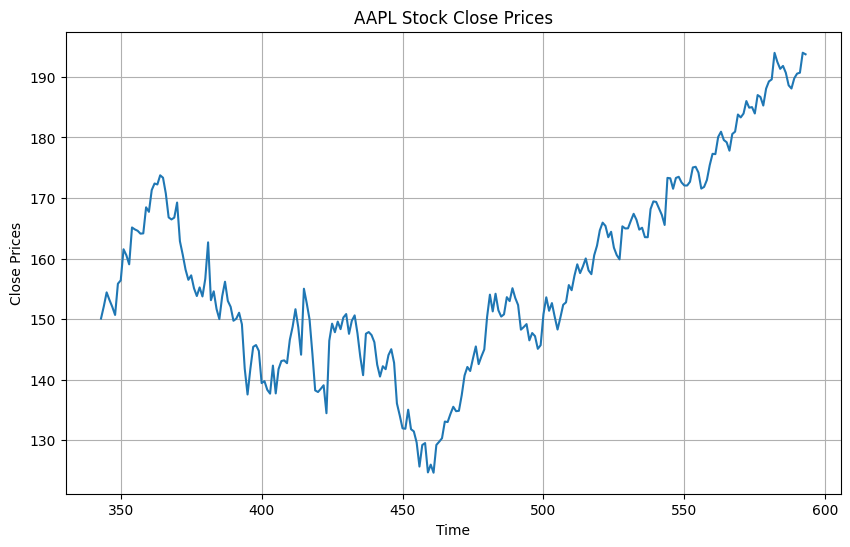

In [ ]:
# Plot the line chart
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(close_prices_AAPL_reverse)
plt.xlabel('Time')
plt.ylabel('Close Prices')
plt.title('AAPL Stock Close Prices')
plt.grid(True)
plt.show()

In [ ]:
# Data preprocessing
import numpy as np
data = close_prices_AAPL_reverse.values.reshape(-1, 1)  # Reshape the data
data_normalized = data / np.max(data)  # Normalize the data

In [ ]:
# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data = data_normalized[:train_size]
test_data = data_normalized[train_size:]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Function to create LSTM model
def create_lstm_model(units, activation, learning_rate):
    model = Sequential()
    model.add(LSTM(units=units, activation=activation, input_shape=(1, 1)))
    model.add(Dense(units=1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [ ]:
# Define hyperparameters for tuning
lstm_units = [50, 100, 200]
lstm_activations = ['relu', 'tanh']
learning_rates = [0.001, 0.01, 0.1]
epochs = 100
batch_size = 32

In [ ]:
# Perform hyperparameter tuning for LSTM model
best_rmse = float('inf')
best_lstm_model = None

In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Function to create LSTM model
def create_lstm_model(units, activation, learning_rate):
    model = Sequential()
    model.add(LSTM(units=units, activation=activation, input_shape=(1, 1)))
    model.add(Dense(units=1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Define hyperparameters for tuning
lstm_units = [50, 100, 200]
lstm_activations = ['relu', 'tanh']
learning_rates = [0.001, 0.01, 0.1]
epochs = 100
batch_size = 32

# Perform hyperparameter tuning for LSTM model
best_rmse = float('inf')
best_lstm_model = None

# Assuming 'data' is your original dataset containing NaN values
# Replace NaN values with the mean of the column
data = pd.DataFrame(data).fillna(pd.DataFrame(data).mean()).values # handle NaN values in the original data

# Split data into train and test sets (adjust split ratio as needed)
train_size = int(len(data) * 0.8)
train_data, test_data = data[0:train_size,:], data[train_size:len(data),:]

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

for units in lstm_units:
    for activation in lstm_activations:
        for learning_rate in learning_rates:
            # Create and train LSTM model
            model = create_lstm_model(units=units, activation=activation, learning_rate=learning_rate)
            model.fit(train_data[:-1].reshape(-1, 1, 1), train_data[1:], epochs=epochs, batch_size=batch_size, verbose=0)

            # Predict on test data
            test_predictions = model.predict(test_data[:-1].reshape(-1, 1, 1)).flatten()

            # Calculate RMSE
            rmse = np.sqrt(mean_squared_error(test_data[1:], test_predictions))

            # Check if current model has lower RMSE
            if rmse < best_rmse:
                best_rmse = rmse
                best_lstm_model = model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [ ]:
# Predict on the entire dataset using the best LSTM model
all_lstm_predictions = best_lstm_model.predict(data_normalized[:-1].reshape(-1, 1, 1)).flatten()

# Inverse normalize the LSTM predictions
all_lstm_predictions = all_lstm_predictions * np.max(data)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

# ... (Your existing code) ...

# Handle NaN values in the target variable before fitting the model
# Replace NaN values with the mean, median, or a suitable imputation strategy
# For example, to replace NaN with the mean:
close_prices_AAPL_reverse = close_prices_AAPL_reverse.fillna(close_prices_AAPL_reverse.mean())
# or
# close_prices_AAPL_reverse = pd.Series(close_prices_AAPL_reverse).fillna(pd.Series(close_prices_AAPL_reverse).mean()).values

# Support Vector Machines (SVM) Model
svm_model = SVR()

svm_params = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

svm_grid_search = GridSearchCV(svm_model, svm_params, scoring='neg_mean_squared_error')
svm_grid_search.fit(np.arange(len(close_prices_AAPL_reverse)).reshape(-1, 1), close_prices_AAPL_reverse)
svm_best_model = svm_grid_search.best_estimator_
svm_predictions = svm_best_model.predict(np.arange(len(close_prices_AAPL_reverse)).reshape(-1, 1))

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor from sklearn.ensemble
from sklearn.model_selection import GridSearchCV

# Random Forest Model
rf_model = RandomForestRegressor()

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}

rf_grid_search = GridSearchCV(rf_model, rf_params, scoring='neg_mean_squared_error')
rf_grid_search.fit(np.arange(len(close_prices_AAPL_reverse)).reshape(-1, 1), close_prices_AAPL_reverse)
rf_best_model = rf_grid_search.best_estimator_
rf_predictions = rf_best_model.predict(np.arange(len(close_prices_AAPL_reverse)).reshape(-1, 1))

# Gradient Boosting Methods (XGBoost)
xgb_model = XGBRegressor()

xgb_params = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

xgb_grid_search = GridSearchCV(xgb_model, xgb_params, scoring='neg_mean_squared_error')
xgb_grid_search.fit(np.arange(len(close_prices_AAPL_reverse)).reshape(-1, 1), close_prices_AAPL_reverse)
xgb_best_model = xgb_grid_search.best_estimator_
xgb_predictions = xgb_best_model.predict(np.arange(len(close_prices_AAPL_reverse)).reshape(-1, 1))

# Gradient Boosting Methods (LightGBM)
lgbm_model = LGBMRegressor()

lgbm_params = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

lgbm_grid_search = GridSearchCV(lgbm_model, lgbm_params, scoring='neg_mean_squared_error')
lgbm_grid_search.fit(np.arange(len(close_prices_AAPL_reverse)).reshape(-1, 1), close_prices_AAPL_reverse)
lgbm_best_model = lgbm_grid_search.best_estimator_
lgbm_predictions = lgbm_best_model.predict(np.arange(len(close_prices_AAPL_reverse)).reshape(-1, 1))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 475, number of used features: 1
[LightGBM] [Info] Start training from score 156.991440
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

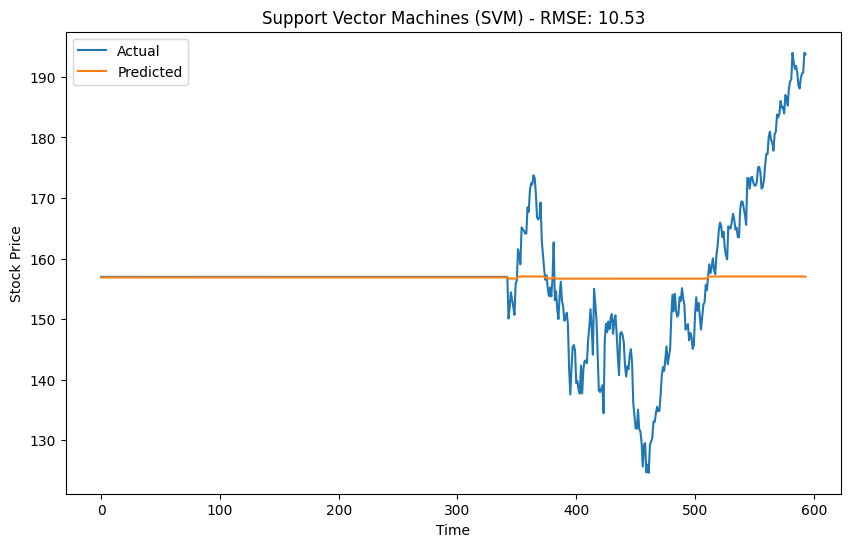

Best Hyperparameters for Support Vector Machines (SVM):
SVR(C=0.1, gamma=1)
-----------------------------


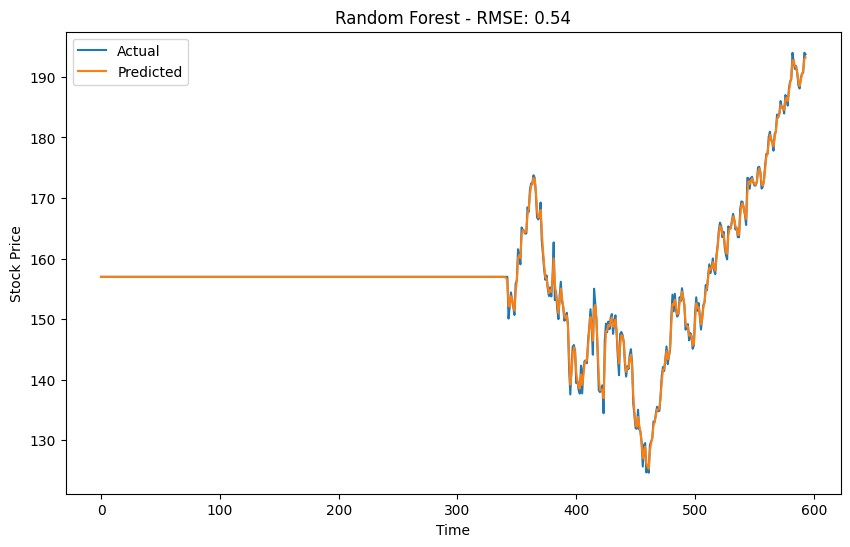

Best Hyperparameters for Random Forest:
RandomForestRegressor(n_estimators=200)
-----------------------------


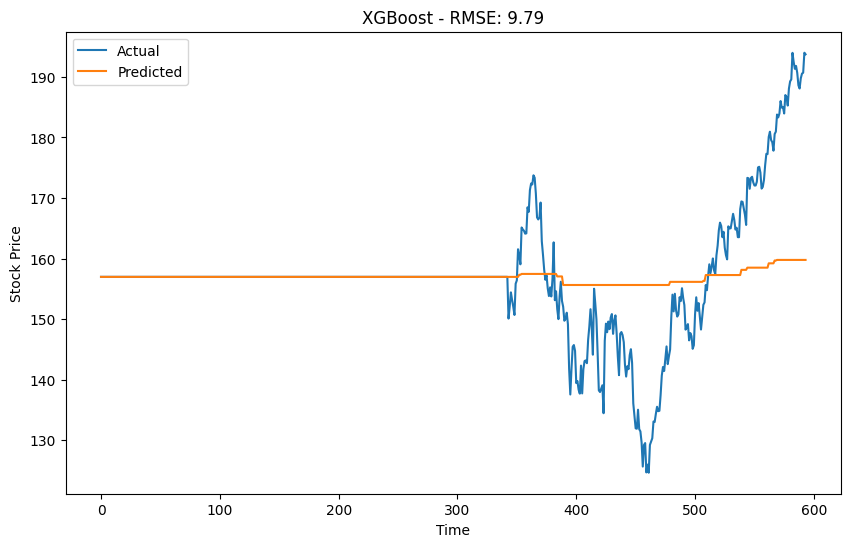

Best Hyperparameters for XGBoost:
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
-----------------------------


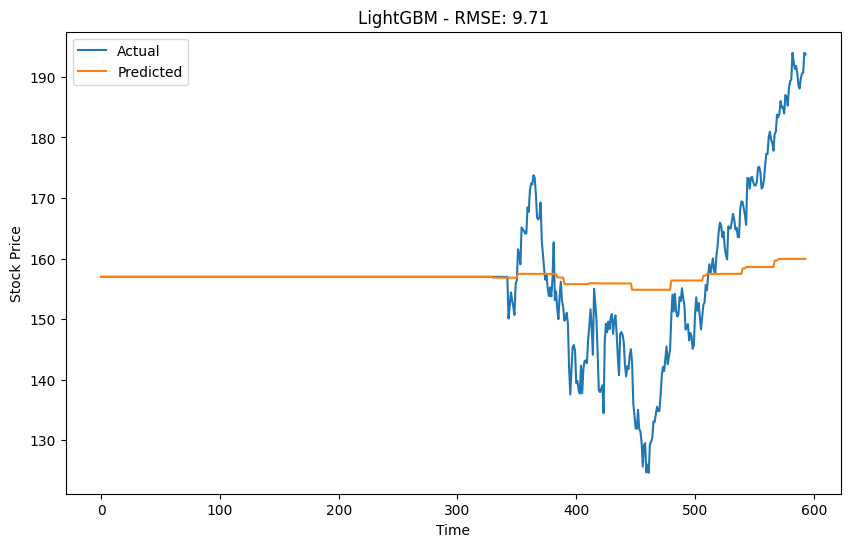

Best Hyperparameters for LightGBM:
LGBMRegressor(learning_rate=0.001, max_depth=7)
-----------------------------


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# List of model names and predictions
model_names = ['Support Vector Machines (SVM)', 'Random Forest', 'XGBoost', 'LightGBM']
predictions = [svm_predictions, rf_predictions, xgb_predictions, lgbm_predictions]
best_models = [svm_best_model, rf_best_model, xgb_best_model, lgbm_best_model]

# Truncate actual values to match the length of predictions
actual_values_reverse = close_prices_AAPL_reverse[-len(svm_predictions):]

# Evaluate models and plot graphs
for i, model_name in enumerate(model_names):
    model_prediction = predictions[i]
    model_prediction_truncated = model_prediction[-len(actual_values_reverse):]  # Truncate predicted values
    model_rmse = rmse(actual_values_reverse, model_prediction_truncated)

    # Plotting actual and predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(actual_values_reverse, label='Actual')
    plt.plot(model_prediction_truncated, label='Predicted')
    plt.title(f"{model_name} - RMSE: {model_rmse:.2f}")
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

    # Print the best hyperparameters for the model
    best_model = best_models[i]
    print(f"Best Hyperparameters for {model_name}:")
    print(best_model)
    print("-----------------------------")


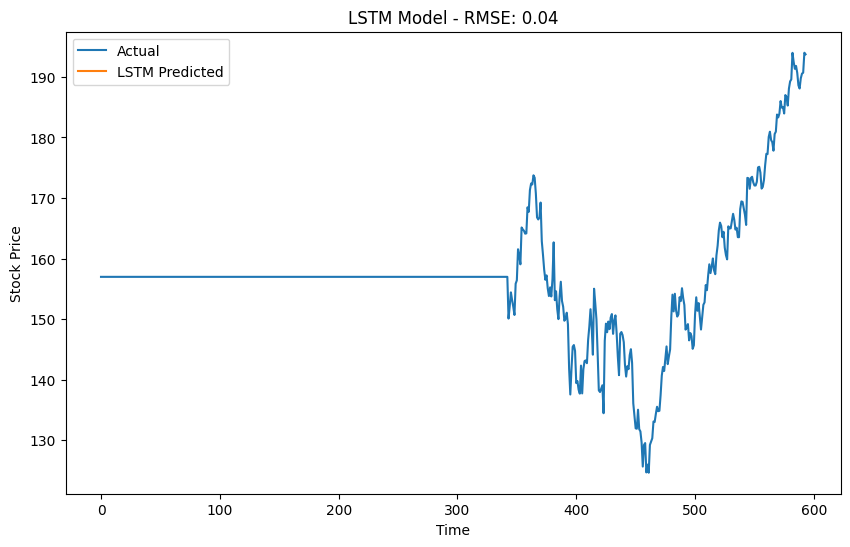

In [ ]:
# Plotting LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(actual_values_reverse, label='Actual')
plt.plot(all_lstm_predictions, label='LSTM Predicted')
plt.title(f"LSTM Model - RMSE: {best_rmse:.2f}")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Saving AAPL_short_volume.csv to AAPL_short_volume (3).csv


<ipython-input-28-d221314c6958>:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  close_prices_AAPL = data['Close'].fillna(method='ffill')
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


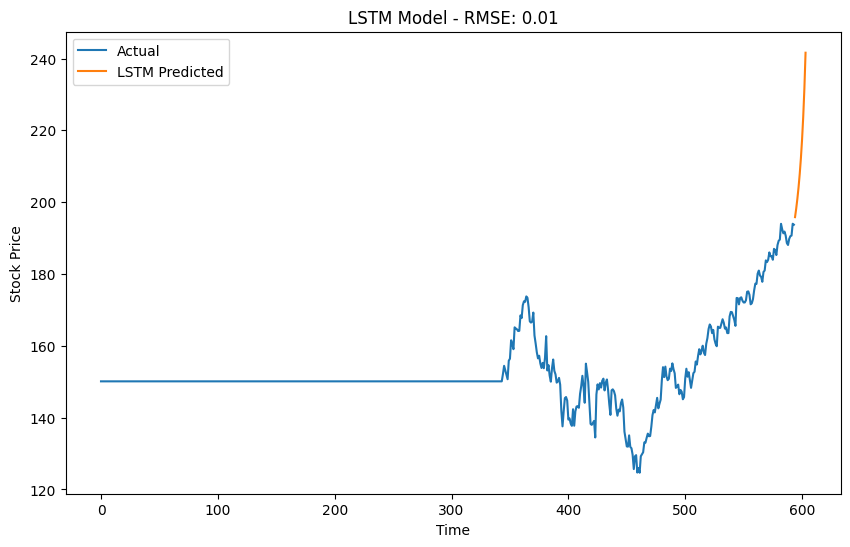

Predicted stock prices for the next 10 days:
Day 1: 195.83
Day 2: 198.22
Day 3: 200.95
Day 4: 204.10
Day 5: 207.79
Day 6: 212.15
Day 7: 217.37
Day 8: 223.72
Day 9: 231.61
Day 10: 241.62


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the file
data = pd.read_csv("AAPL_short_volume.csv")

# Select the Close prices and handle NaN values by forward filling
close_prices_AAPL = data['Close'].fillna(method='ffill')

# Reverse the order of the data
close_prices_AAPL_reverse = close_prices_AAPL.iloc[::-1]

# Reset index to maintain the correct time series order in the plot
close_prices_AAPL_reverse.reset_index(drop=True, inplace=True)

# Data preprocessing
data = close_prices_AAPL_reverse.values.reshape(-1, 1)  # Reshape the data
data_normalized = data / np.max(data)  # Normalize the data

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data = data_normalized[:train_size]
test_data = data_normalized[train_size:]

# Function to create LSTM model
def create_lstm_model(units, activation, learning_rate):
    model = Sequential()
    model.add(LSTM(units=units, activation=activation, input_shape=(1, 1)))
    model.add(Dense(units=1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Define hyperparameters for tuning
lstm_units = [50, 100, 200]
lstm_activations = ['relu', 'tanh']
learning_rates = [0.001, 0.01, 0.1]
epochs = 100
batch_size = 32

# Perform hyperparameter tuning for LSTM model
best_rmse = float('inf')
best_lstm_model = None

for units in lstm_units:
    for activation in lstm_activations:
        for learning_rate in learning_rates:
            # Create and train LSTM model
            model = create_lstm_model(units=units, activation=activation, learning_rate=learning_rate)
            model.fit(train_data[:-1].reshape(-1, 1, 1), train_data[1:], epochs=epochs, batch_size=batch_size, verbose=0)

            # Predict on test data
            test_predictions = model.predict(test_data[:-1].reshape(-1, 1, 1)).flatten()

            # Calculate RMSE
            rmse = np.sqrt(mean_squared_error(test_data[1:], test_predictions))

            # Check if current model has lower RMSE
            if rmse < best_rmse:
                best_rmse = rmse
                best_lstm_model = model

# Predict on the entire dataset using the best LSTM model
all_lstm_predictions = best_lstm_model.predict(data_normalized[:-1].reshape(-1, 1, 1)).flatten()

# Inverse normalize the LSTM predictions
all_lstm_predictions = all_lstm_predictions * np.max(data)

# Calculate the scaling factor based on the maximum value of the original data
scaling_factor = np.max(close_prices_AAPL_reverse)

# Function to predict future stock prices using the LSTM model
def predict_future_lstm(model, data, num_predictions, scaling_factor):
    predictions = []

    # Get the last data point from the input data
    last_data_point = data[-1]

    for _ in range(num_predictions):
        # Predict the next time step
        prediction = model.predict(last_data_point.reshape(1, 1, 1))
        predictions.append(prediction[0, 0])

        # Update last_data_point to include the predicted value for the next iteration
        last_data_point = np.append(last_data_point[1:], prediction)

    # Inverse normalize the predictions
    predictions = np.array(predictions) * scaling_factor

    return predictions

# Predict the next 10 days using the LSTM model
num_predictions = 10
lstm_predictions = predict_future_lstm(best_lstm_model, data_normalized, num_predictions, scaling_factor)

# Plot the LSTM predictions for the next 10 days
plt.figure(figsize=(10, 6))
plt.plot(close_prices_AAPL_reverse, label='Actual')
plt.plot(np.arange(len(close_prices_AAPL_reverse), len(close_prices_AAPL_reverse) + num_predictions), lstm_predictions, label='LSTM Predicted')
plt.title(f"LSTM Model - RMSE: {best_rmse:.2f}")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the predicted stock prices for the next 10 days using LSTM
print("Predicted stock prices for the next 10 days:")
for i, prediction in enumerate(lstm_predictions, start=1):
    print(f"Day {i}: {prediction:.2f}")


In [ ]:
!pip install alpha_vantage


In [ ]:
!pip install yfinance
